# **Task 3 -  Exploratory Data Analysis - Retail**
This task is part of the internship with The Sparks Foundation. In this task as a business manager, we have to try to find out the weak areas where we can
work to make more profit.

# **Author : Disha Dutta**

**Importing all the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import files

**Loading the dataset**

In [2]:
uploaded = files.upload()
dt = pd.read_csv('SampleSuperstore.csv')

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [3]:
dt

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
# displaying top 5 rows
dt.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
# displaying bottom 5 rows
dt.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
#shape of the dataset
dt.shape

(9994, 13)

In [7]:
# concise summary of the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
dt.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# checking if any column has null values
dt.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
# checking column with number of distinct observations
dt.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
# checking number of repeated observations in the dataset
dt.duplicated().sum()

17

In [12]:
# cast Postal Code as object type
dt['Postal Code'] = dt['Postal Code'].astype('object')

In [13]:
# dropping the dupplicated rows from the dataset
dt.drop_duplicates(subset=None,keep='first',inplace=True)
# checking of the removing was successful
dt.duplicated().sum()

0

**Visualisation of Data**

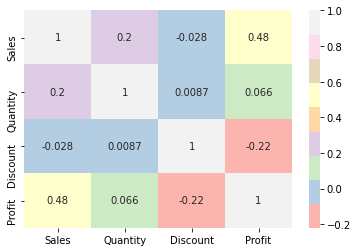

In [14]:
# pairwise correlation of all columns in the dataframe
corr = dt.corr()
sns.heatmap(corr,annot=True,cmap='Pastel1')

In [15]:
# dropping Postal Code column as we don't need them
dt = dt.drop(['Postal Code'],axis = 1)

**Observations on the dataset to get to the solution**

In [16]:
# counts of unique values for segment
dt['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

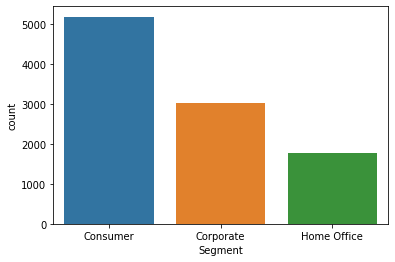

In [17]:
# counts of observations in Segment
sns.countplot(x=dt['Segment'])

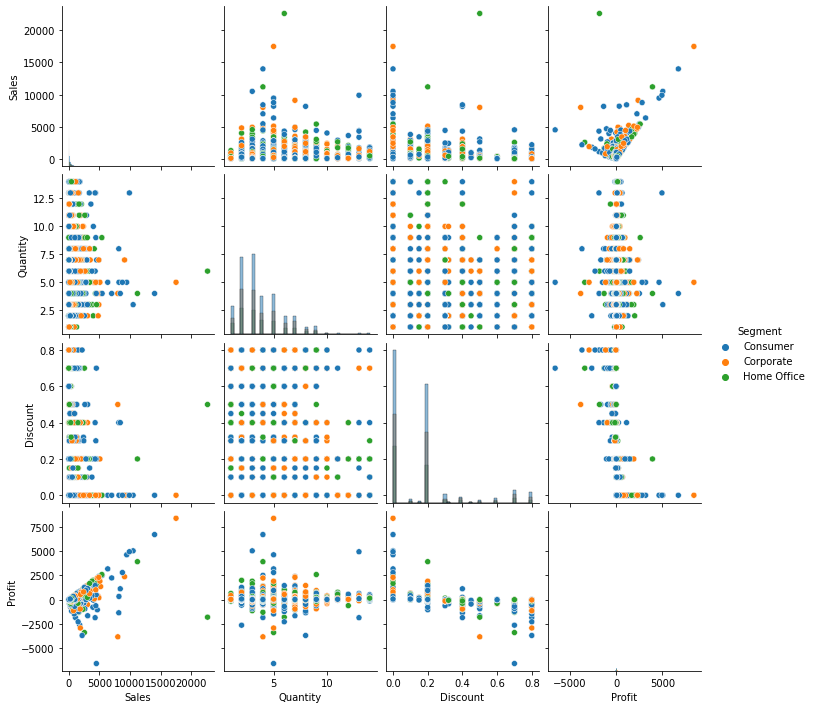

In [18]:
# pairwise relationships in the dataset
sns.pairplot(dt, hue = 'Segment', diag_kind="hist")

In [19]:
# counts of unique values for segment
dt['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

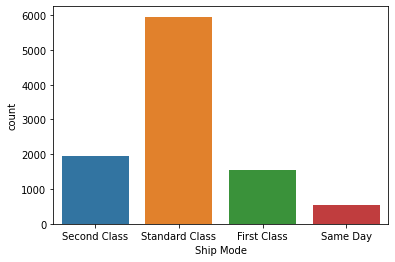

In [20]:
# counts of observations in Ship Mode
sns.countplot(x=dt['Ship Mode'])

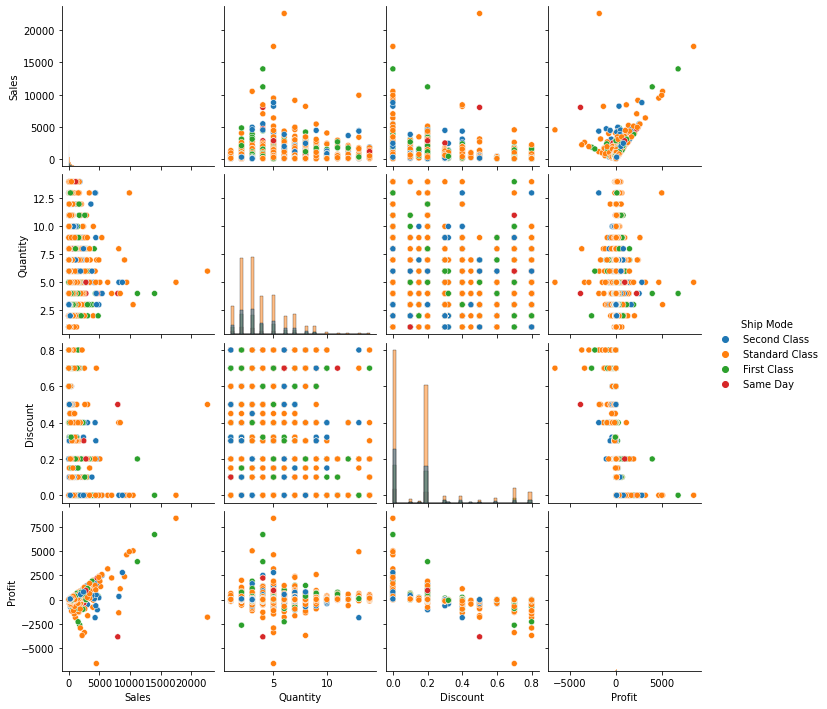

In [21]:
# pairwise relationships in the dataset
sns.pairplot(dt, hue = 'Ship Mode', diag_kind="hist")

In [22]:
# counts of unique values for segment
dt['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

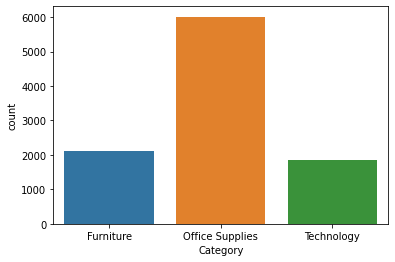

In [23]:
# counts of observations in Category
sns.countplot(x=dt['Category'])

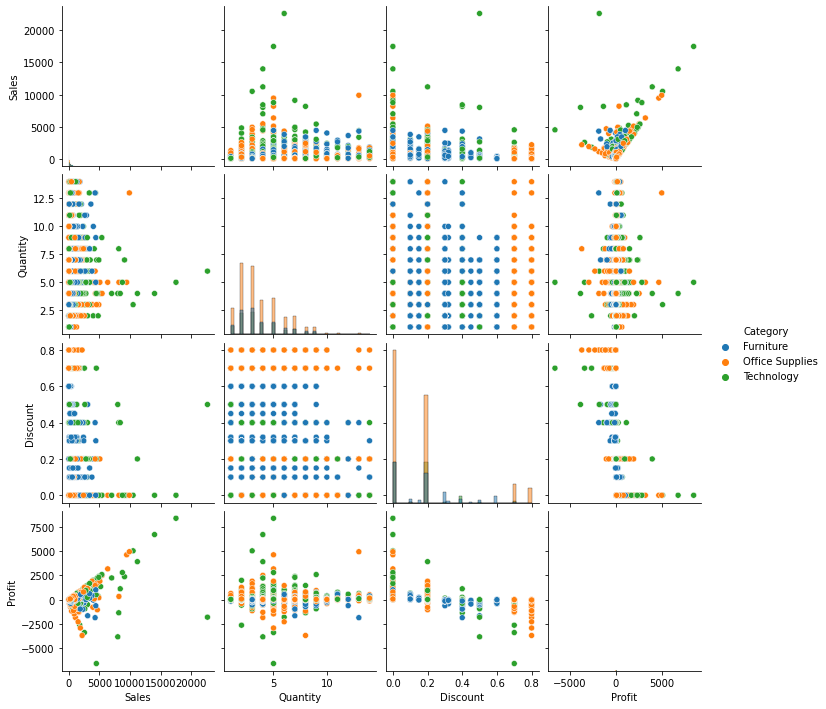

In [24]:
# pairwise relationships in the dataset
sns.pairplot(dt, hue = 'Category', diag_kind="hist")

In [25]:
# counts of unique values for segment
dt['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

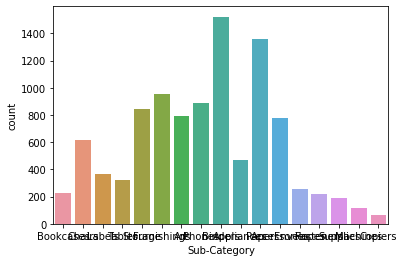

In [26]:
# counts of observations in Sub-Category
sns.countplot(x=dt['Sub-Category'])

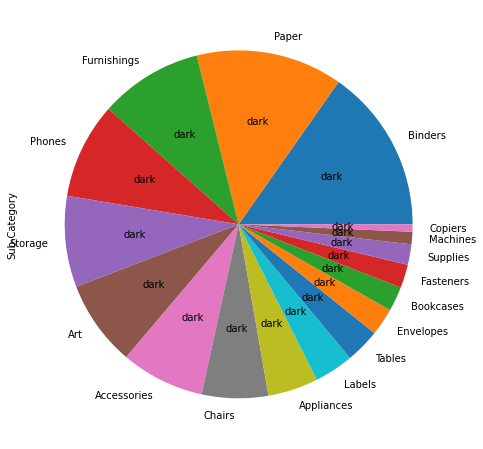

In [27]:
plt.figure(figsize=(10,8))
dt['Sub-Category'].value_counts().plot.pie(autopct='dark')
plt.show()

From the above pie chart we can see that Binders are having maximum amount while Copiers are having minimum amount.

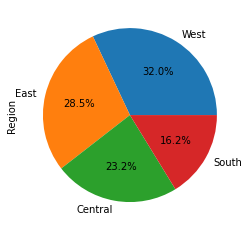

In [28]:
plt.figure(figsize=(8,4))
dt['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

From the above pie chart we can observe that maximum buyers are from West region

In [29]:
dt['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

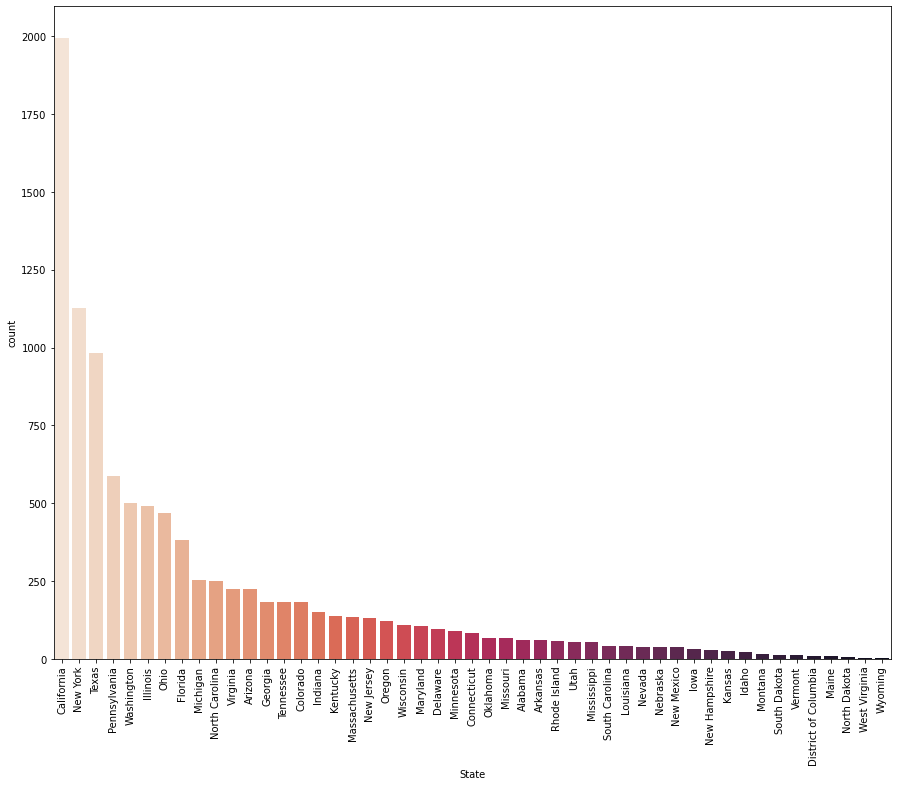

In [30]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=dt,palette='rocket_r',order=dt['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

We can observe that higherset number of buyers are from California and lowest are from Wyoming

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cfac71e90>,
      dtype=object)

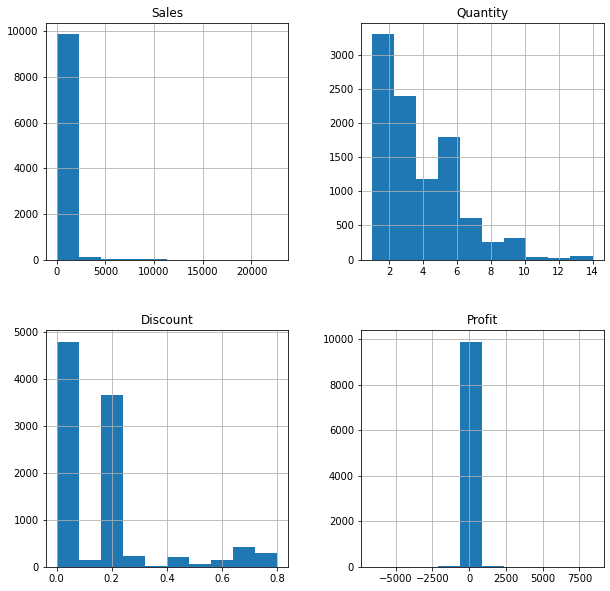

In [31]:
dt.hist(figsize=(10,10))

Relation between PRofit and Discout, Sales or Quantity

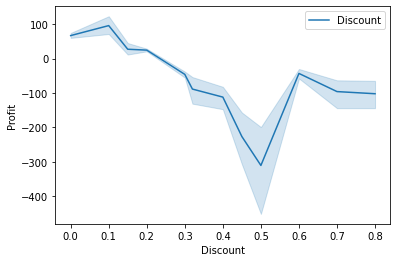

In [32]:
sns.lineplot(data=dt, x='Discount',y='Profit', label='Discount')
plt.legend()
plt.show()

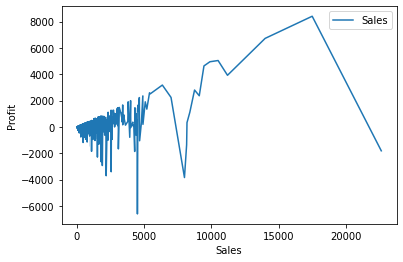

In [33]:
sns.lineplot(data=dt, x='Sales',y='Profit', label='Sales')
plt.legend()
plt.show()

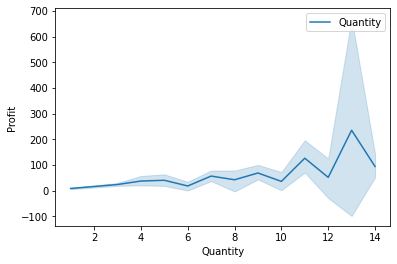

In [34]:
sns.lineplot(data=dt, x='Quantity',y='Profit', label='Quantity')
plt.legend()
plt.show()

Plotting graph between Profit and Sales depending on various parameters

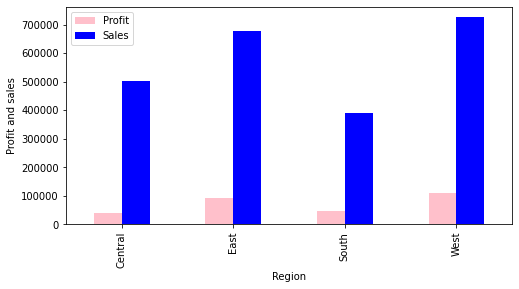

In [35]:
dt.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,4))
plt.ylabel('Profit and sales')
plt.show()

Profit and SAles are maximum in West region and minimum in South region

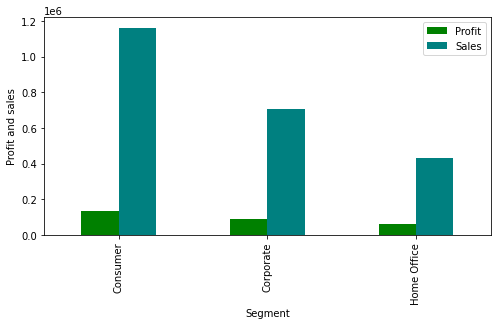

In [36]:
dt.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['green','teal'],figsize=(8,4))
plt.ylabel('Profit and sales')
plt.show()

We can observe that Profit and Sales are maximum in Consumer and minimum in Home Office



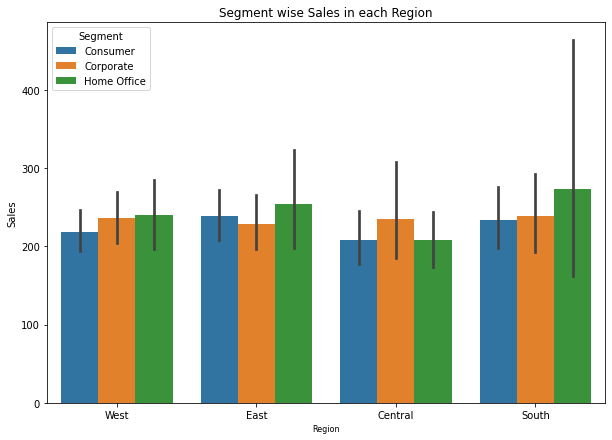

In [37]:
plt.figure(figsize=(10,7))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=dt,hue='Segment',order=dt['Region'].value_counts().index)
plt.xlabel('Region',fontsize=8)
plt.show()

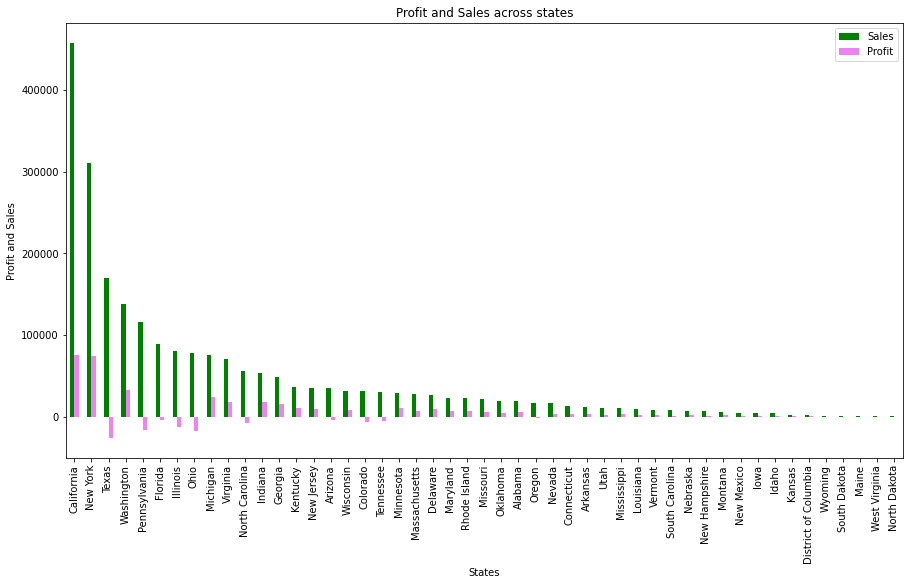

In [38]:
ps = dt.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['green','violet'],figsize=(15,8))
plt.title('Profit and Sales across states')
plt.xlabel('States')
plt.ylabel('Profit and Sales')
plt.show()

Hence, we can observe that most hight profit is for California and the least profit is for Texas

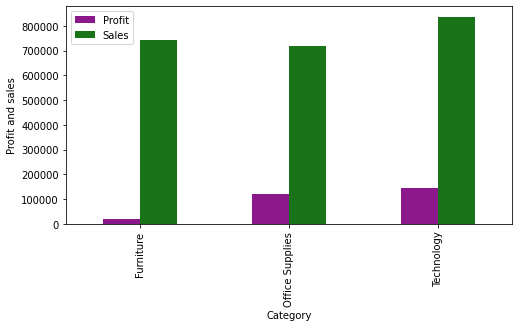

In [39]:
dt.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['purple','darkgreen'],alpha=0.9,figsize=(8,4))
plt.ylabel('Profit and sales')
plt.show()

Thus, we can observe that Technology Category have high Profit while Furniture have less Profit

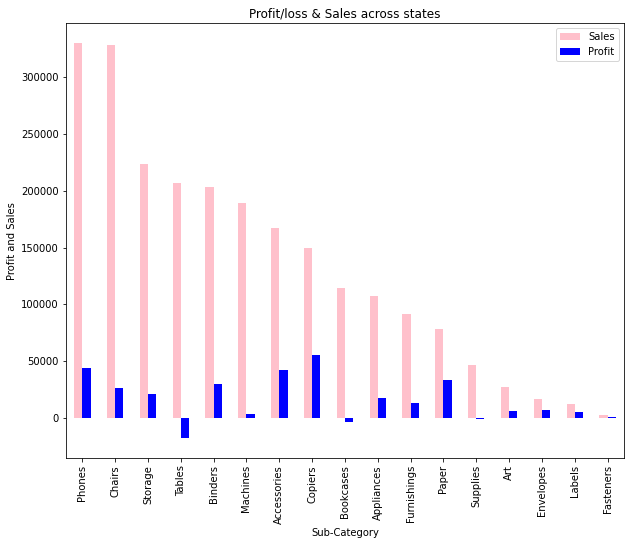

In [40]:
ps = dt.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['pink','blue'],figsize=(10,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit and Sales')
plt.show()

And hence, Sub-Category Phones have the highest Sales and Tables and Bookcases are in loss